In [5]:
# weather data downloaded from NOAA climate data online search: https://www.ncei.noaa.gov/cdo-web/search

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [87]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [88]:
seattle = pd.read_csv('3205260.csv')
boston = pd.read_csv('3205261.csv')

In [89]:
seattle.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TOBS'],
      dtype='object')

In [90]:
print(seattle.isna().sum()['TMAX'])
print(len(seattle))

42577
61634


In [91]:
def get_dict(city_data):
    city_stations = list(city_data['STATION'].unique())
    city_nas = []
    for station in city_stations:
        station_data = city_data[city_data['STATION'] == station]
        station_na = station_data.isna().sum()['TMIN']
        city_nas.append(station_na)

    city_dict = {city_stations[i]: city_nas[i] for i in range(len(city_stations))}
    city_complete = [station for station, nas in city_dict.items() if nas == 0]
    return city_dict, city_complete

In [92]:
seattle_dict, seattle_complete = get_dict(seattle)
boston_dict, boston_complete = get_dict(boston)
print(seattle_complete)
print(boston_complete)

['USS0021B31S', 'USC00458508', 'USS0021B50S', 'USC00450456', 'USW00024233', 'USR0000WGRN', 'USR0000WFTA', 'USW00094290']
['USW00014739', 'USC00193276', 'USC00190736', 'USC00195984', 'USW00054704', 'USC00193624', 'USC00198757', 'USW00014753', 'USW00094723']


In [93]:
seattle_keep = seattle[seattle['STATION'] == seattle_complete[0]]
seattle_keep = seattle_keep[['DATE', 'TMAX', 'TMIN']]
boston_keep = boston[boston['STATION'] == boston_complete[0]]
boston_keep = boston_keep[['DATE', 'TMAX', 'TMIN']]

In [94]:
seattle_keep.to_csv("seattle_cleaned.csv")
boston_keep.to_csv("boston_cleaned.csv")

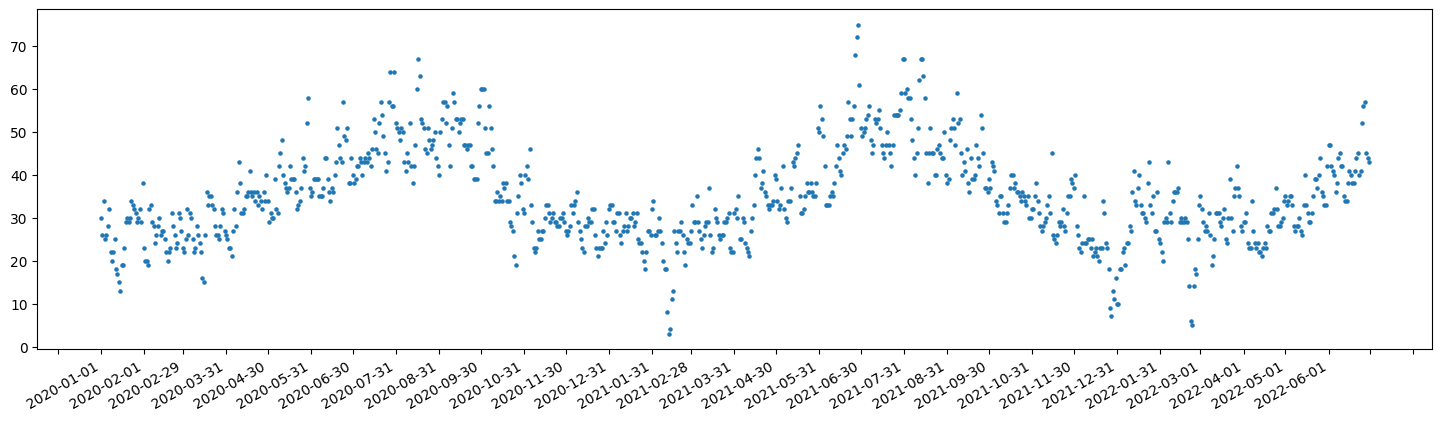

In [84]:
plt.figure(figsize=(18, 5))
plt.scatter(seattle_keep['DATE'], seattle_keep['TMIN'], s = 5)
ax = plt.gca()

ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()